In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(''.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes_data_upload.csv to diabetes_data_upload.csv



In [5]:
filename = 'diabetes_data_upload.csv'
data = pd.read_csv(filename)
print(data.shape)
print(data)

(520, 17)
     Age  Gender Polyuria  ... Alopecia Obesity     class
0     40    Male       No  ...      Yes     Yes  Positive
1     58    Male       No  ...      Yes      No  Positive
2     41    Male      Yes  ...      Yes      No  Positive
3     45    Male       No  ...       No      No  Positive
4     60    Male      Yes  ...      Yes     Yes  Positive
..   ...     ...      ...  ...      ...     ...       ...
515   39  Female      Yes  ...       No      No  Positive
516   48  Female      Yes  ...       No      No  Positive
517   58  Female      Yes  ...       No     Yes  Positive
518   32  Female       No  ...      Yes      No  Negative
519   42    Male       No  ...       No      No  Negative

[520 rows x 17 columns]


In [4]:
columns = data.columns

In [5]:
columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [7]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
class,0,0.0
Genital thrush,0,0.0
Gender,0,0.0
Polyuria,0,0.0
Polydipsia,0,0.0
sudden weight loss,0,0.0
weakness,0,0.0
Polyphagia,0,0.0
visual blurring,0,0.0
Obesity,0,0.0


In [6]:
diabetes = data['class']
data = data.drop(['class'],axis = 1)

In [13]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [14]:
diabetes

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
515    Positive
516    Positive
517    Positive
518    Negative
519    Negative
Name: class, Length: 520, dtype: object

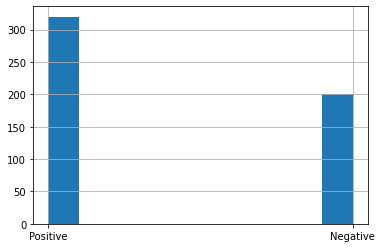

In [15]:
diabetes.hist()

In [7]:
data[['Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']] = data[['Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']].replace({'No':0,'Yes':1})

In [18]:
data['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
515    Female
516    Female
517    Female
518    Female
519      Male
Name: Gender, Length: 520, dtype: object

In [8]:
data['Gender'] = data['Gender'].replace({'Male':0,'Female':1})

In [57]:
data['Age'].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

In [53]:
Stats = data['Age'].describe()

In [55]:
Stats[1]

48.02884615384615

In [56]:
Stats[2]

12.151465995249461

In [63]:
data['Age'].to_numpy()

array([40, 58, 41, 45, 60, 55, 57, 66, 67, 70, 44, 38, 35, 61, 60, 58, 54,
       67, 66, 43, 62, 54, 39, 48, 58, 32, 42, 52, 38, 53, 57, 41, 37, 54,
       49, 48, 60, 63, 35, 30, 53, 50, 50, 35, 40, 48, 60, 60, 35, 46, 36,
       50, 60, 50, 51, 38, 66, 53, 59, 39, 65, 35, 55, 60, 45, 40, 30, 35,
       25, 50, 40, 35, 65, 38, 50, 55, 48, 55, 39, 43, 35, 47, 50, 48, 35,
       49, 38, 28, 68, 35, 45, 48, 40, 40, 36, 56, 30, 31, 35, 39, 48, 85,
       90, 72, 70, 69, 58, 47, 25, 39, 53, 52, 68, 79, 55, 45, 30, 45, 65,
       34, 48, 35, 40, 47, 38, 55, 66, 57, 32, 48, 47, 43, 30, 16, 35, 66,
       54, 58, 51, 40, 47, 62, 49, 53, 68, 61, 39, 38, 44, 45, 50, 42, 55,
       57, 62, 33, 55, 48, 56, 38, 28, 68, 35, 45, 48, 40, 57, 41, 37, 54,
       49, 48, 60, 63, 35, 30, 53, 50, 50, 35, 40, 31, 35, 39, 48, 85, 90,
       72, 70, 69, 58, 54, 64, 36, 43, 31, 66, 61, 58, 69, 40, 28, 37, 34,
       30, 67, 60, 58, 54, 43, 39, 40, 43, 49, 47, 45, 57, 72, 30, 27, 38,
       43, 40, 55, 68, 29

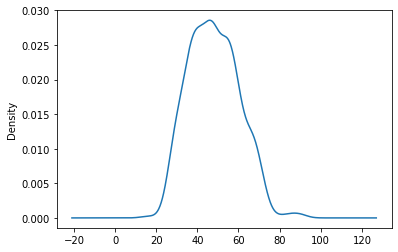

In [22]:
data['Age'].plot.kde()

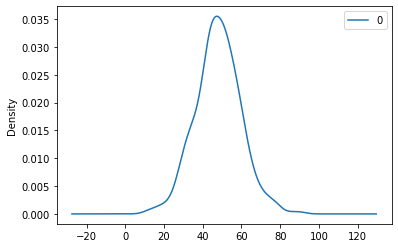

In [71]:
pd.DataFrame(np.random.normal(Stats[1], Stats[2], 520)).plot.kde()

In [62]:
np.random.normal(Stats[1], Stats[2], 520)

array([59.73454525, 34.85374825, 43.3462385 , 45.13392076, 57.470095  ,
       30.59554795, 33.72596216, 55.91383479, 43.06712949, 49.80677617,
       65.19001584, 86.03970693, 62.79292347, 47.30726519, 40.24173611,
       46.81628196, 54.41591738, 34.09474761, 30.6490772 , 44.6884129 ,
       37.62067422, 66.19307997, 29.01760576, 63.01456247, 58.57164077,
       48.07421838, 75.76051337, 45.16161874, 40.52231952, 54.47713764,
       42.92446093, 37.93018538, 44.07413303, 42.51092152, 38.36955143,
       53.06617284, 44.64200489, 17.77760498, 21.35972509, 21.45385046,
       47.65592739, 21.48953866, 60.3348529 , 36.11022916, 31.90949938,
       22.84425597, 43.44933749, 26.64824231, 66.21943405, 44.96185113,
       41.84991643, 68.53091027, 59.67347652, 61.44465318, 62.1009101 ,
       49.85092211, 51.8836224 , 53.23123952, 62.487868  , 78.22398179,
       45.2124519 , 51.90640962, 46.76796777, 92.73465841, 60.88796657,
       63.59688268, 45.68291966, 56.23531276, 17.69354443, 53.46

In [70]:
import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=data['Age'].to_numpy(), f_exp=(np.random.normal(Stats[1], Stats[2], 520)))

#(statistic=4.36, pvalue=0.35947)

Power_divergenceResult(statistic=4166.927974515396, pvalue=0.0)

In [9]:
teen = pd.DataFrame(np.zeros((len(diabetes))),columns = ['Teen'])
adult = pd.DataFrame(np.zeros((len(diabetes))),columns = ['Adult'])
old = pd.DataFrame(np.zeros((len(diabetes))),columns = ['Old'])

In [10]:
teen['Teen'] = data['Age'].loc[data['Age'] <= 20.0]
adult['Adult'] = data['Age'].loc[data['Age'] > 0].loc[data['Age'] <= 65]
old['Old'] = data['Age'].loc[data['Age'] > 65]

In [11]:
teen = teen.isna().replace({True: 0,False:1})

In [12]:
adult = adult.isna().replace({True: 0,False:1})

In [13]:
old = old.isna().replace({True: 0,False:1})

In [14]:
diabetes = diabetes.replace({'Negative':0,'Positive':1})

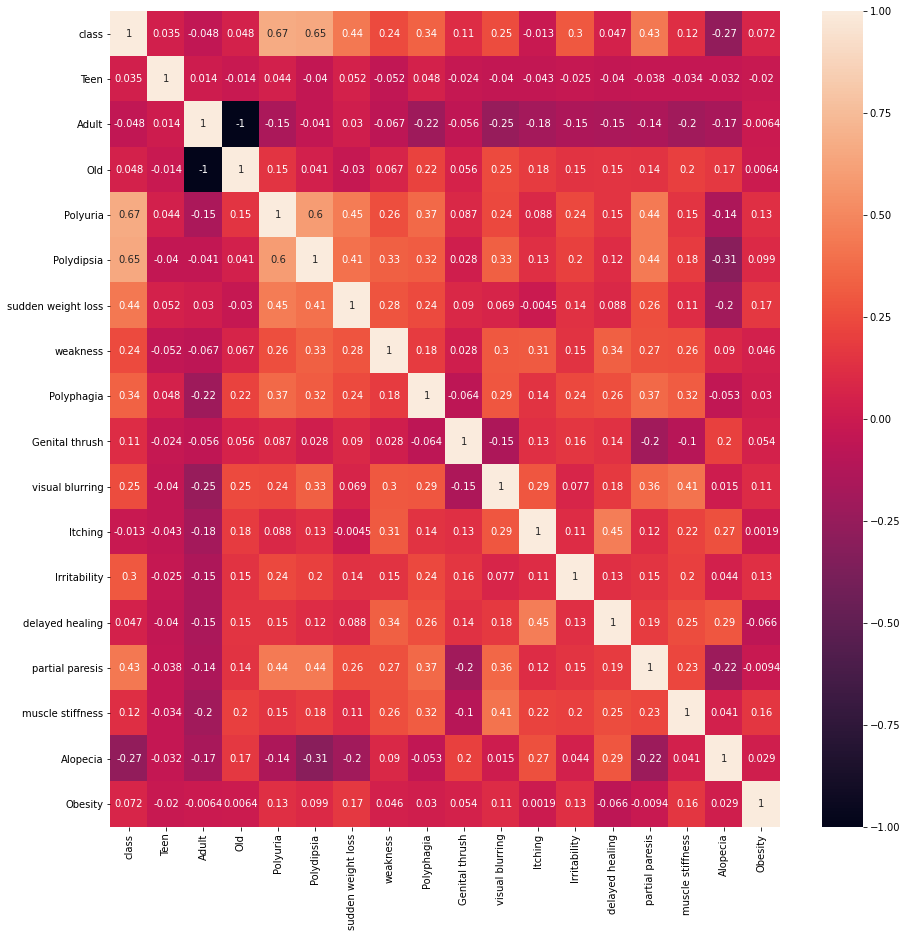

In [36]:
#Matriz de Correlaciones

plt.figure(figsize=(15,15)) #manage the size of the plot
sns.heatmap(pd.concat([diabetes,teen,adult,old,data[['Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]],axis = 1).corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

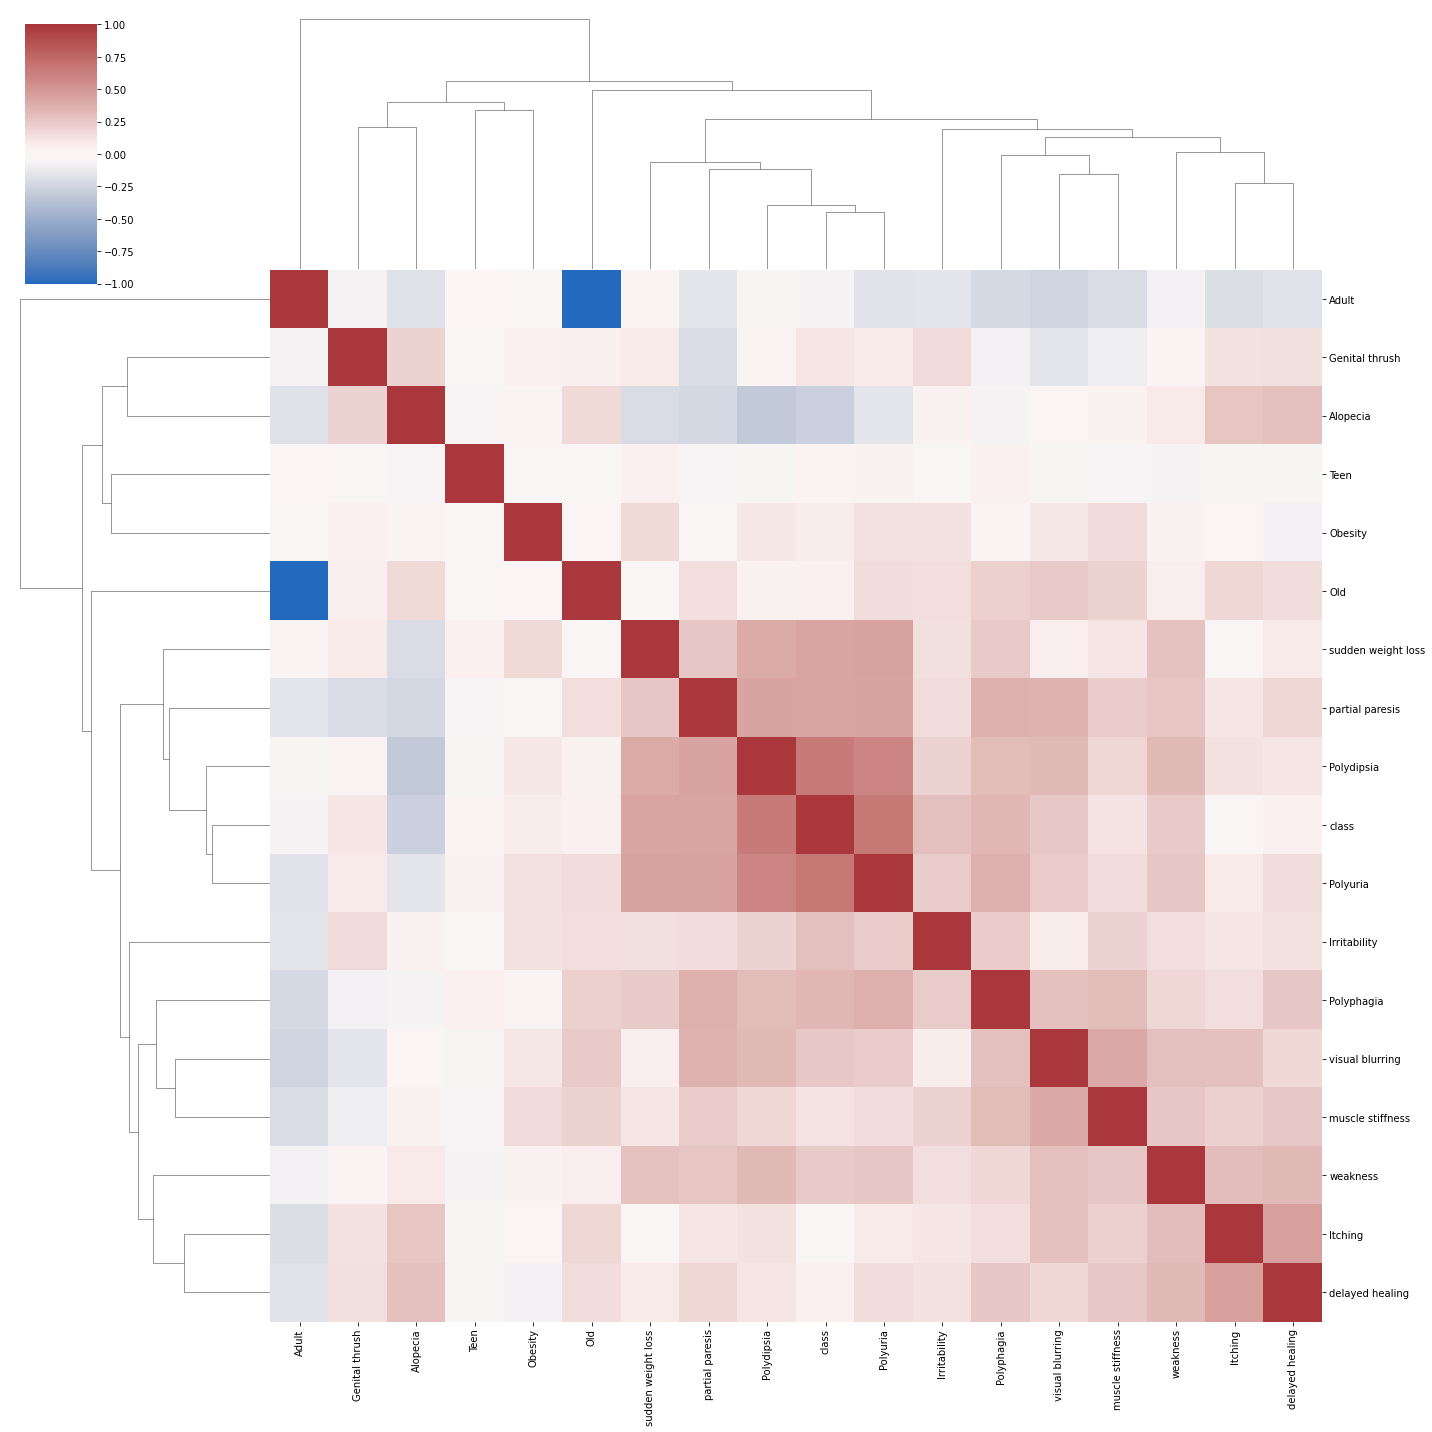

In [37]:
sns.clustermap(pd.concat([diabetes,teen,adult,old,data[['Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]],axis = 1).corr(),
                                cmap="vlag",
                                figsize=(20,20))

In [41]:
columnas1 = ['Teen','Adult','Old','Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']

In [38]:
y = diabetes.to_numpy()
X = pd.concat([teen,adult,old,data[['Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]],axis = 1).to_numpy()

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [19]:
from sklearn.metrics import accuracy_score

In [42]:
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth' : [1,2,3,4,5,6,7,8],
          'min_samples_split': [2,3,4,5,6,7,8],
          'min_samples_leaf': [1,2,3,4,5,6,7,8]}

In [43]:
DT = DecisionTreeClassifier()

grid_dt = GridSearchCV(DT, params, cv=10)
modeldt = grid_dt.fit(X_train, y_train)

In [44]:
grid_dt.best_score_

0.956678281068525

In [45]:
grid_dt.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [46]:
grid_dt. best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
DT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DT = DT.fit(X_train,y_train)
y_train_predictDT = DT.predict(X_train)
y_test_predictDT  = DT.predict(X_test)

In [48]:
accuracy_score(y_test,y_test_predictDT)

0.9326923076923077

In [49]:
accuracy_score(y_train,y_train_predictDT)

0.9807692307692307

In [50]:
cn = ['Negative','Positive']

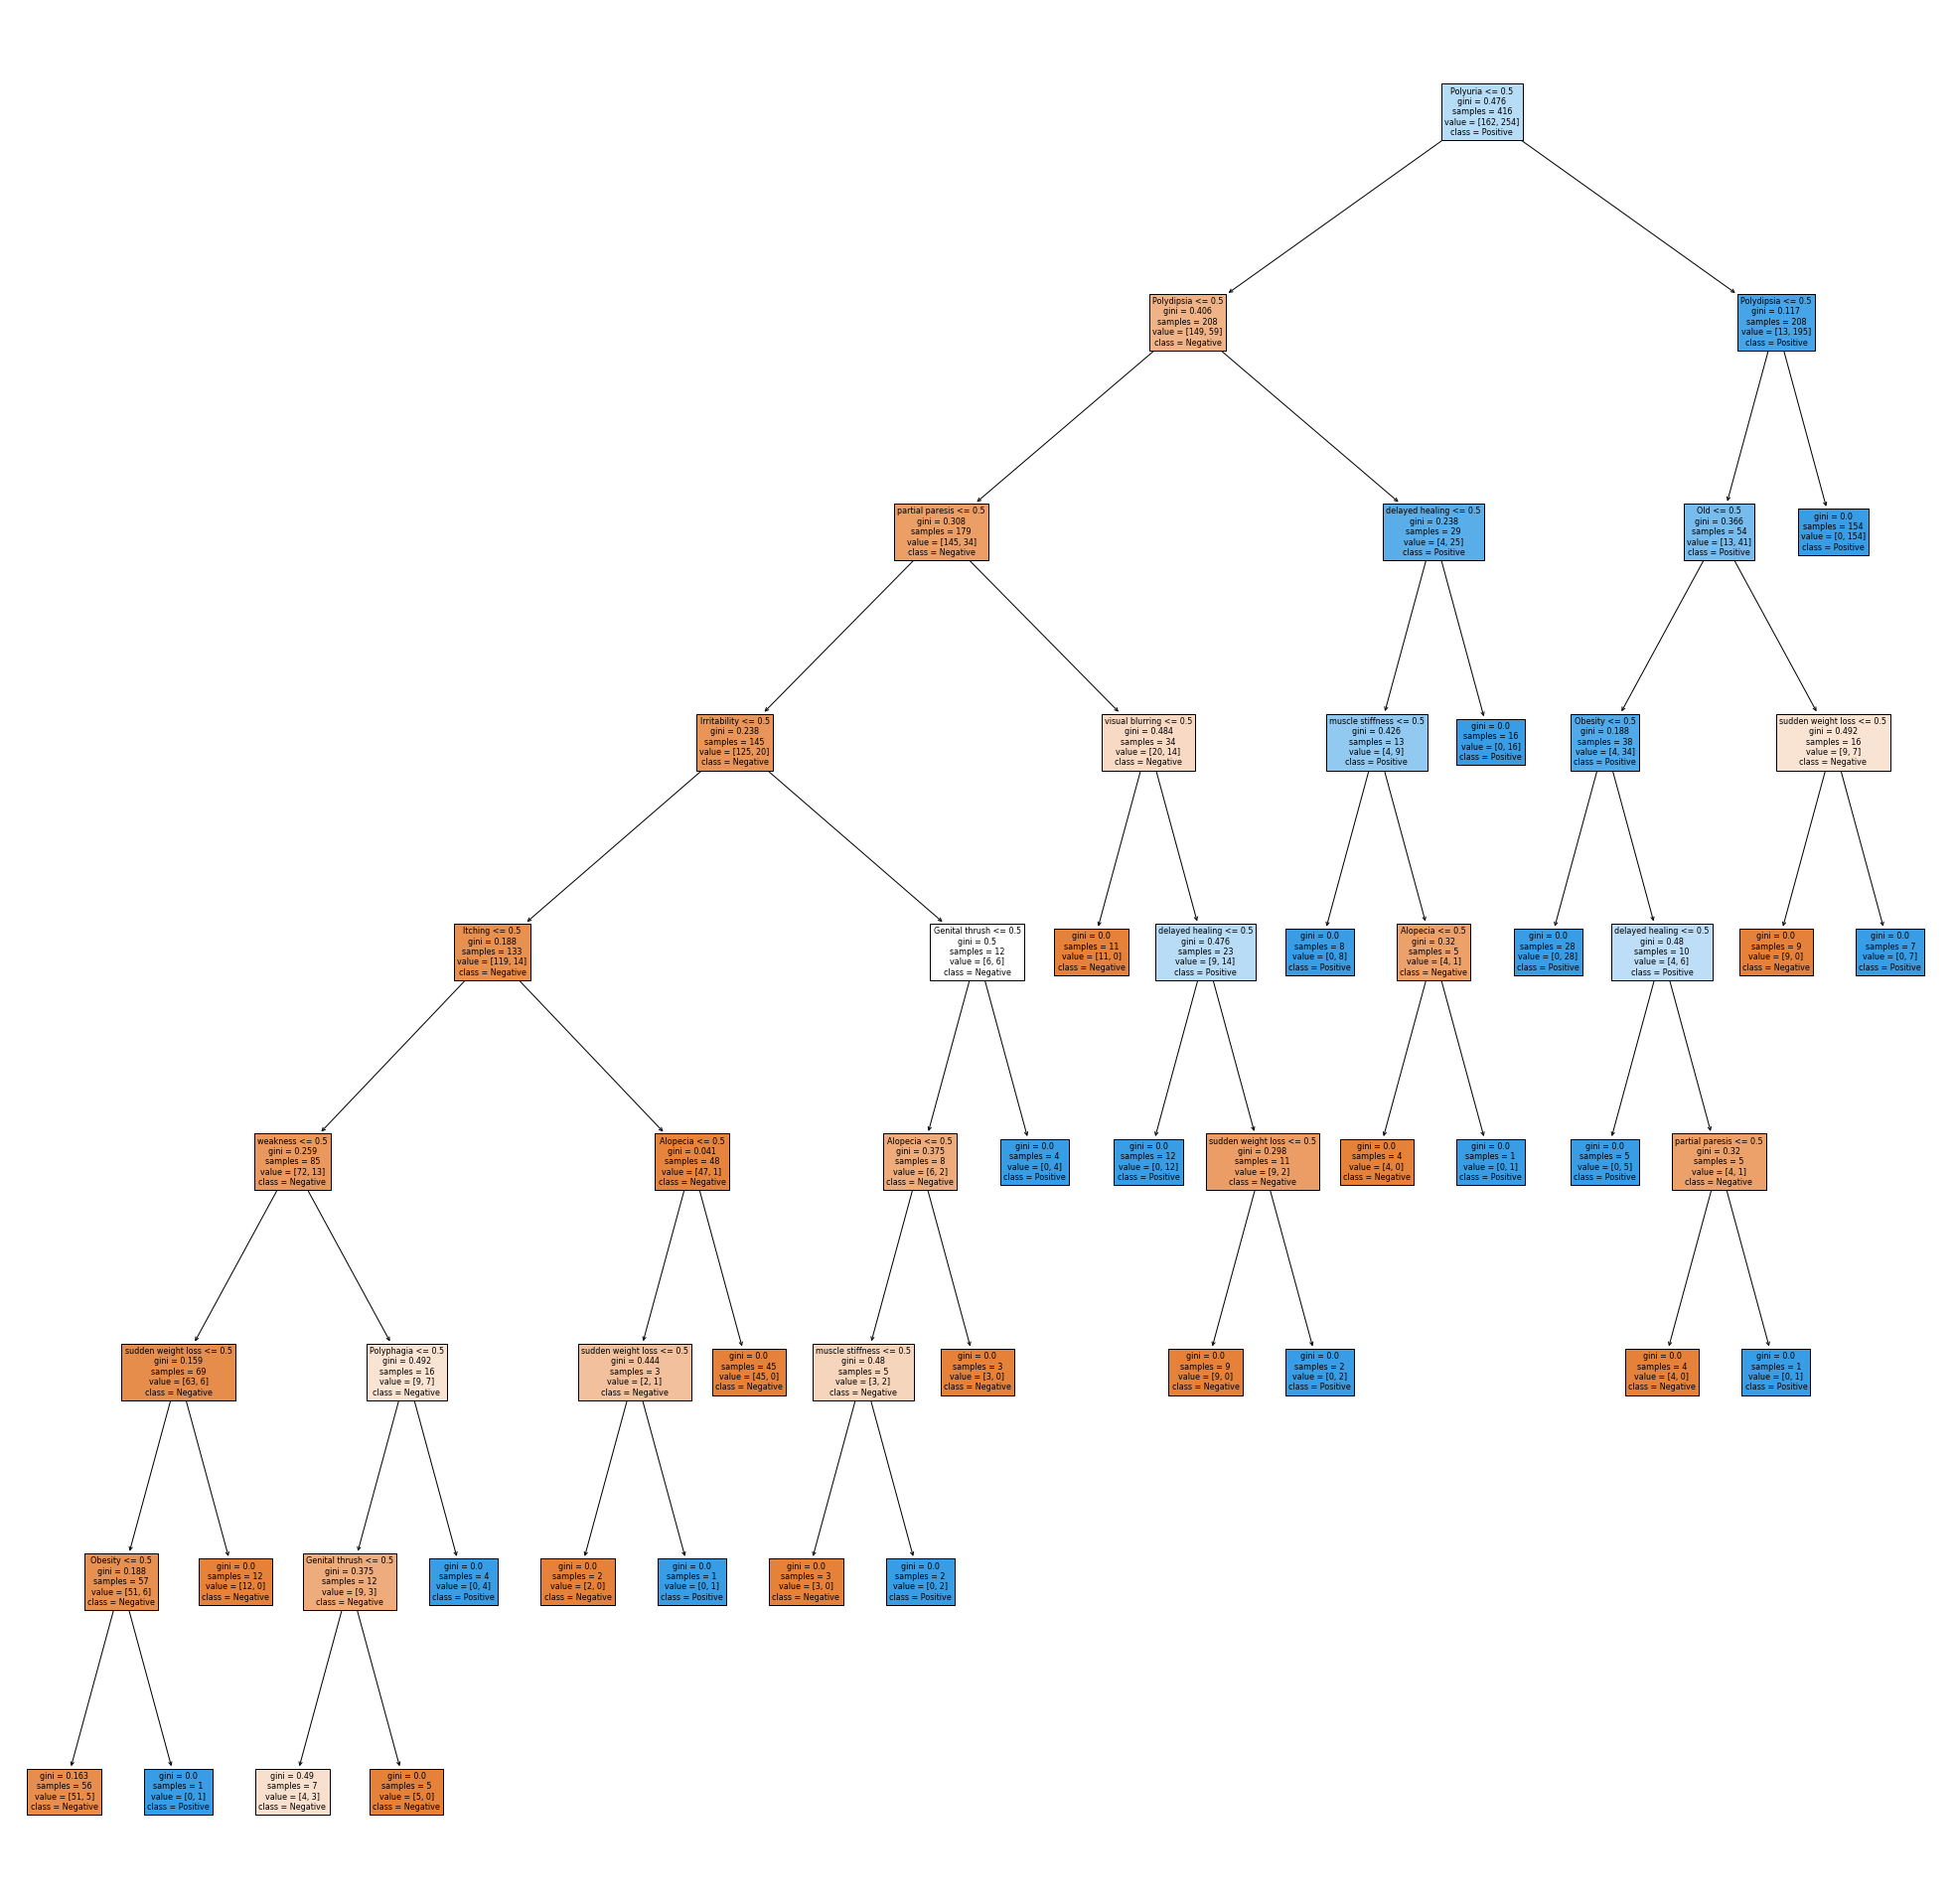

In [51]:
from sklearn import tree
plt.figure(figsize=(35,35))
tree.plot_tree(DT,feature_names = columnas1, 
               class_names=cn,
               filled = True)
plt.show()

In [ ]:
#Prediction with early symptoms of diabetes mellitus

In [ ]:
#Polydipsia,Polyuria,Polyphagia,Blurred Vision,delayed_healing,weakness

In [ ]:
columnas1

In [22]:
X1 = data[['Polyuria','Polydipsia','Polyphagia','visual blurring','delayed healing','weakness']].to_numpy()
y = diabetes.to_numpy()

In [35]:
columnas2 = ['Polyuria','Polydipsia','Polyphagia','visual blurring','delayed healing','weakness']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X1, y, test_size=0.2, random_state=1)

In [24]:
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth' : [1,2,3,4,5,6,7,8],
          'min_samples_split': [2,3,4,5,6,7,8],
          'min_samples_leaf': [1,2,3,4,5,6,7,8]}

In [25]:
DT = DecisionTreeClassifier()

grid_dt = GridSearchCV(DT, params, cv=10)
modeldt = grid_dt.fit(X_train, y_train)

In [26]:
grid_dt.best_score_

0.9254936120789781

In [27]:
grid_dt.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [28]:
grid_dt. best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
DT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DT = DT.fit(X_train,y_train)
y_train_predictDT = DT.predict(X_train)
y_test_predictDT  = DT.predict(X_test)

In [30]:
accuracy_score(y_test,y_test_predictDT)

0.875

In [31]:
accuracy_score(y_train,y_train_predictDT)

0.9399038461538461

In [32]:
cn = ['Negative','Positive']

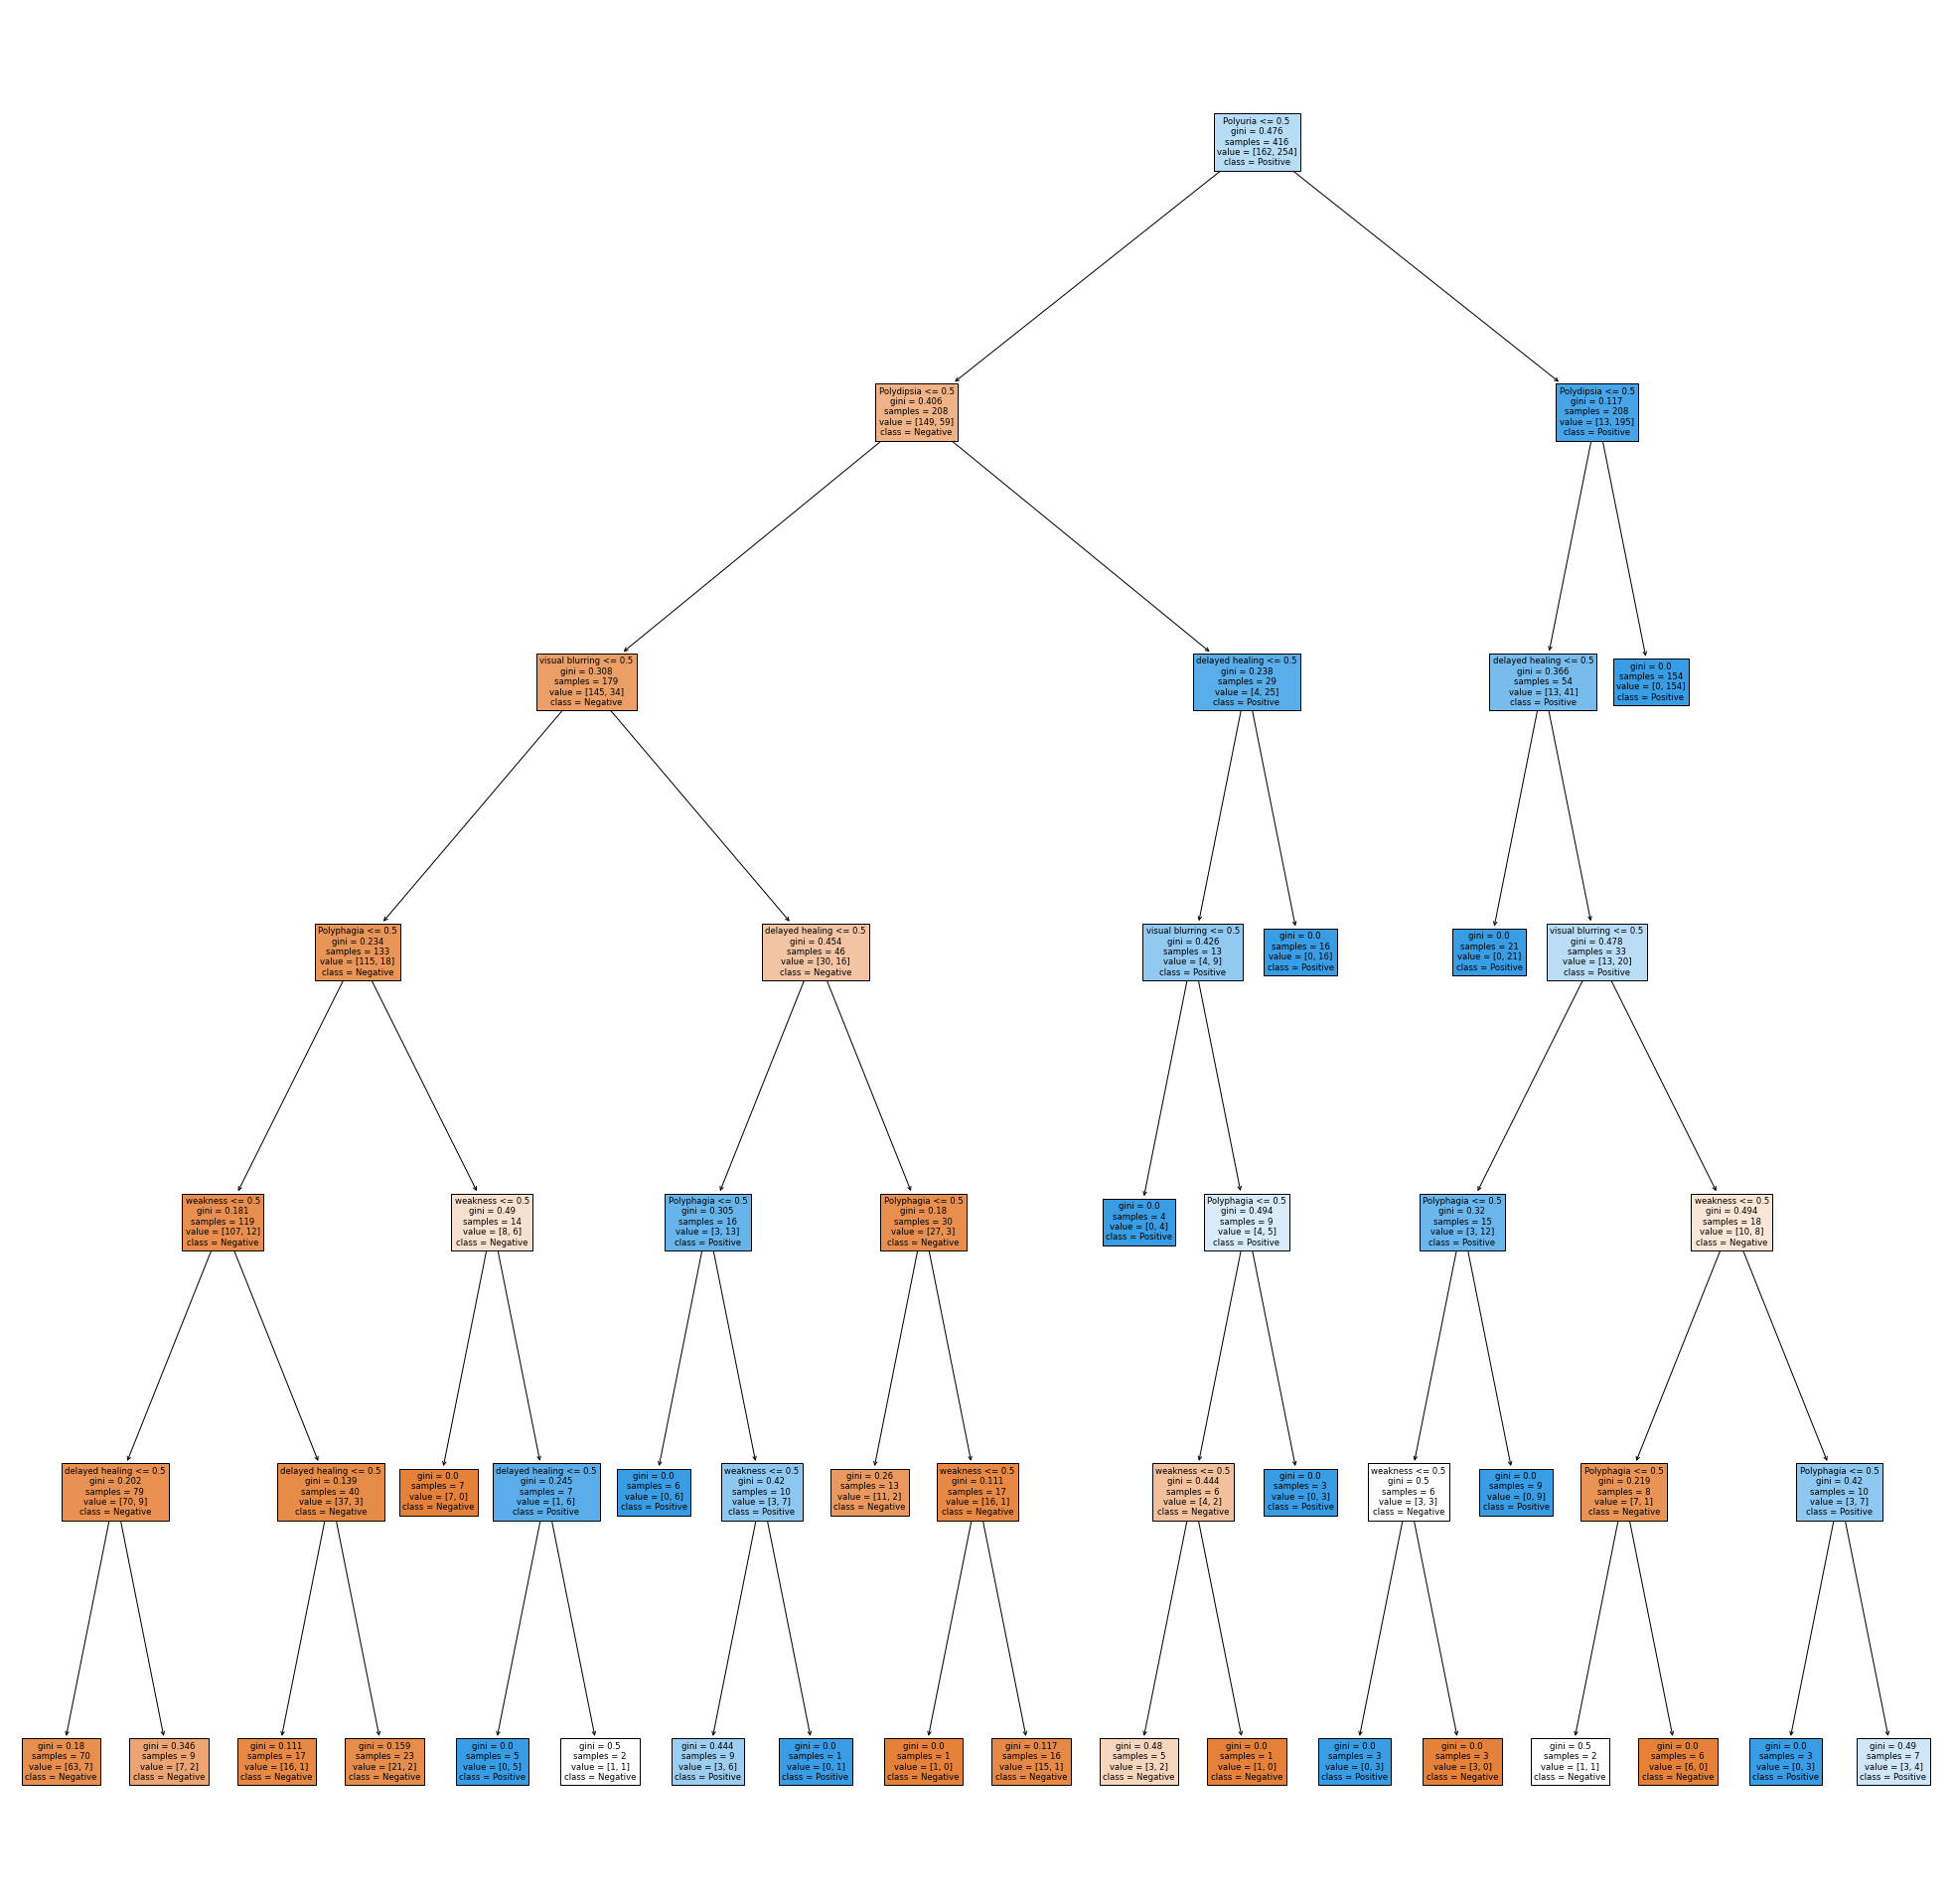

In [36]:
from sklearn import tree
plt.figure(figsize=(35,35))
tree.plot_tree(DT,feature_names = columnas2, 
               class_names=cn,
               filled = True)
plt.show()